In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('default_of_credit_card_clients.xls')
data= data[1:]
print(data)

           X1 X2 X3 X4  X5  X6  X7  X8  X9 X10  ...    X15    X16    X17  \
1       20000  2  2  1  24   2   2  -1  -1  -2  ...      0      0      0   
2      120000  2  2  2  26  -1   2   0   0   0  ...   3272   3455   3261   
3       90000  2  2  2  34   0   0   0   0   0  ...  14331  14948  15549   
4       50000  2  2  1  37   0   0   0   0   0  ...  28314  28959  29547   
5       50000  1  2  1  57  -1   0  -1   0   0  ...  20940  19146  19131   
...       ... .. .. ..  ..  ..  ..  ..  ..  ..  ...    ...    ...    ...   
29996  220000  1  3  1  39   0   0   0   0   0  ...  88004  31237  15980   
29997  150000  1  3  2  43  -1  -1  -1  -1   0  ...   8979   5190      0   
29998   30000  1  2  2  37   4   3   2  -1   0  ...  20878  20582  19357   
29999   80000  1  3  1  41   1  -1   0   0   0  ...  52774  11855  48944   
30000   50000  1  2  1  46   0   0   0   0   0  ...  36535  32428  15313   

         X18    X19    X20   X21    X22   X23  Y  
1          0    689      0     0    

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data.drop('Y', axis=1))
scaled_features = scaler.transform(data.drop('Y', axis=1))
scaled_data = pd.DataFrame(scaled_features, columns = data.drop('Y', axis=1).columns)


In [4]:
#Разделение датасета на обучающие и тестовые данные
from sklearn.model_selection import train_test_split
x = scaled_data
y = data['Y']
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x, y, test_size = 0.3)
print(x_training_data)
print("-------------------------------------------------")
print(y_training_data)
print("-------------------------------------------------")
print(x_test_data)
print("-------------------------------------------------")
print(y_test_data)


             X1        X2        X3        X4        X5        X6        X7  \
19096 -0.905498  0.810161  0.185828 -1.057295 -0.595102  0.014861  0.111736   
16620 -0.905498 -1.234323  0.185828  0.858557  0.381275  2.684416  1.782348   
21573 -1.059646  0.810161  0.185828 -1.057295 -1.462993  1.794564  1.782348   
7651   0.019389 -1.234323 -1.079457 -1.057295  0.489762  0.014861  0.111736   
10266 -0.828424  0.810161 -1.079457  0.858557 -0.595102 -1.764843 -1.558876   
...         ...       ...       ...       ...       ...       ...       ...   
18384 -1.059646  0.810161  1.451114 -1.057295 -1.462993  0.014861  0.111736   
7950  -0.520128  0.810161  1.451114 -1.057295  1.900084  0.014861  0.111736   
16893  0.250611 -1.234323 -1.079457 -1.057295  0.706734 -1.764843 -1.558876   
25258 -0.674276  0.810161 -1.079457  0.858557 -1.354506 -0.874991 -0.723570   
15392 -0.905498  0.810161  1.451114 -1.057295  1.900084  0.014861  0.111736   

             X8        X9       X10  ...       X14 

K =  26
Error =  0.18577777777777776


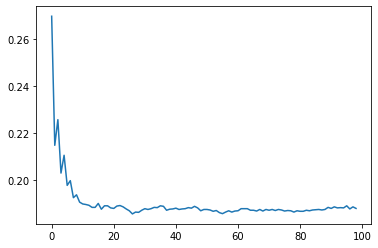

In [5]:
#Выбор оптимального значения для K с помощью метода «Локтя»
from sklearn.neighbors import KNeighborsClassifier
error_rates = []
y_training_data = y_training_data.astype('int')
for i in np.arange(1, 100):
    new_model = KNeighborsClassifier(n_neighbors = i)
    new_model.fit(x_training_data, y_training_data)
    new_predictions = new_model.predict(x_test_data)
    error_rates.append(np.mean(new_predictions != y_test_data))
val, idx = min((val, idx) for (idx, val) in enumerate(error_rates))
plt.plot(error_rates)
print("K = ",idx)
print("Error = ",error_rates[idx])

In [6]:
#Обучение модели K-ближайших соседей
model = KNeighborsClassifier(n_neighbors = idx)
model.fit(x_training_data, y_training_data)


KNeighborsClassifier(n_neighbors=26)

In [7]:
#Делаем предсказания с помощью алгоритма K-ближайших соседей
predictions = model.predict(x_test_data)


In [8]:
#Оценка точности нашей модели
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_test_data = y_test_data.astype('int')

print(classification_report(y_test_data, predictions))


              precision    recall  f1-score   support

           0       0.83      0.96      0.89      7024
           1       0.66      0.30      0.41      1976

    accuracy                           0.81      9000
   macro avg       0.75      0.63      0.65      9000
weighted avg       0.79      0.81      0.78      9000



In [9]:
#Генерируем матрицу ошибок
error_matrix = confusion_matrix(y_test_data, predictions)
print(error_matrix)
print()
print("Percentage of errors = " + str(round(1-error_matrix[1,1]/np.sum(error_matrix,axis=1).tolist()[1], 3)))


[[6723  301]
 [1383  593]]

Percentage of errors = 0.7
